In [1]:
import pickle
from gcdyn.deeplearning import NeuralNetworkModel
from gcdyn.poisson import ConstantResponse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("merged-simu.pkl", "rb") as f:
    samples = pickle.load(f)

In [5]:
param_to_predict = [[ConstantResponse(row[0].xscale)] for row in samples["responses"]]

model = NeuralNetworkModel(samples["trees"], param_to_predict)

In [7]:
model.fit(epochs=100)

Epoch 1/100


2023-05-01 15:10:18.026058: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 2s 37ms/step - loss: 0.2508
Epoch 2/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0497
Epoch 3/100
20/20 [==============================] - 1s 37ms/step - loss: 0.0533
Epoch 4/100
20/20 [==============================] - 1s 33ms/step - loss: 0.0517
Epoch 5/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0422
Epoch 6/100
20/20 [==============================] - 1s 30ms/step - loss: 0.0391
Epoch 7/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0393
Epoch 8/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0399
Epoch 9/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0361
Epoch 10/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0412
Epoch 11/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0367
Epoch 12/100
20/20 [==============================] - 1s 28ms/step - loss: 0.0366
Epoch 13/100
20/20 [=================

In [38]:
result = model.predict(model.trees, ladderize_trees=False)

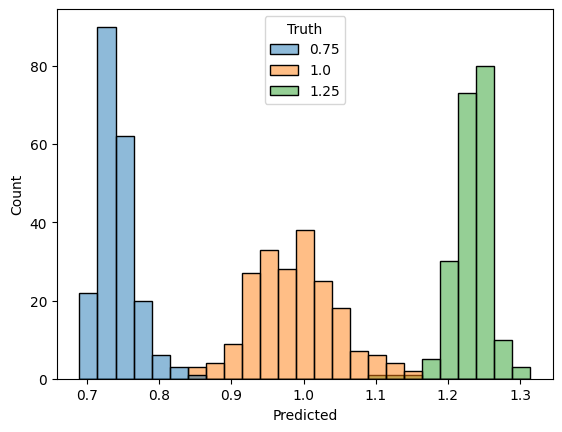

In [39]:
df = pd.DataFrame(
    {
        "Predicted": np.array([row[0].value for row in result]),
        "Truth": np.array([row[0].xscale for row in samples["responses"]], dtype=str),
    }
)

sns.histplot(df, x="Predicted", hue="Truth", binwidth=0.025)
plt.show()